In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [31]:
filename = "recovered_coeffs"

# get all csv files from directoy that carry the name filename
files = [f for f in os.listdir() if filename in f]
files.sort()
print(files)

# read all csv files into a pandas dataframe by appending the column 'sindy' to the first dataframe
# initialize the dataframe with the first file
df = pd.read_csv(files[0], index_col=0)
# remove the column sindy
df = df.drop(columns=['sindy'])

for file in files:
    # get beta value from filename
    beta = file.split("beta")[1].split(".")[0]
    df['sindy_beta' + beta] = pd.read_csv(file)['sindy'].values

['recovered_coeffs_beta1.csv', 'recovered_coeffs_beta2.csv', 'recovered_coeffs_beta3.csv', 'recovered_coeffs_beta4.csv', 'recovered_coeffs_beta5.csv']


In [32]:
df

,groundtruth,sindy_beta1,sindy_beta2,sindy_beta3,sindy_beta4,sindy_beta5
term,,,,,,
1,0.0500,0.31,0.04,0.04,0.03,0.04
q,0.9000,0.41,0.88,0.94,1.04,0.94
c,-0.0125,-0.40,0.00,-0.04,-0.02,-0.05
r,0.0000,0.00,0.00,0.00,0.00,0.00
q^2,0.0000,-0.17,0.04,-0.08,-0.28,-0.08
q c,-0.2250,0.98,-0.33,-0.24,-0.30,-0.22
q r,0.0000,0.00,0.00,0.00,0.00,0.00
c^2,0.0000,0.00,0.00,0.00,0.00,0.00
c r,0.2500,0.21,0.33,0.31,0.29,0.30


{1: 0.182125, 2: 0.013375000000000003, 3: 0.015124999999999996, 4: 0.039625, 5: 0.014124999999999999}


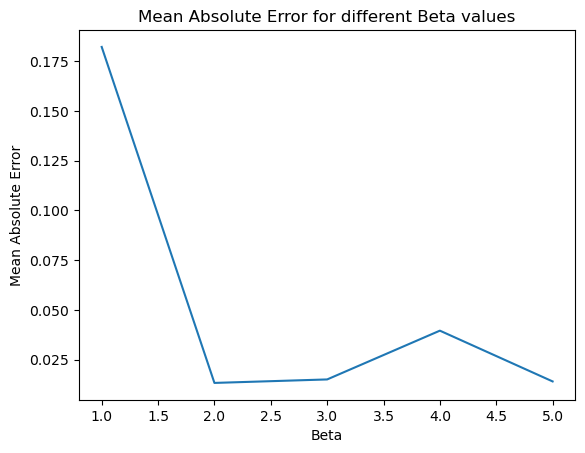

In [80]:
# compute the mae for each beta value
mae = {}
for beta in df.columns[1:]:
    mae[int(beta.split("beta")[1])] = np.mean(np.abs(df['groundtruth'] - df[beta]))
    
print(mae)

# plot mae for each beta value
plt.plot(mae.keys(), mae.values())
plt.xlabel("Beta")
plt.ylabel("Mean Absolute Error")
plt.title("Mean Absolute Error for different Beta values")
plt.show()

Correctly recovered coefficients: [16 18 17 17 17]


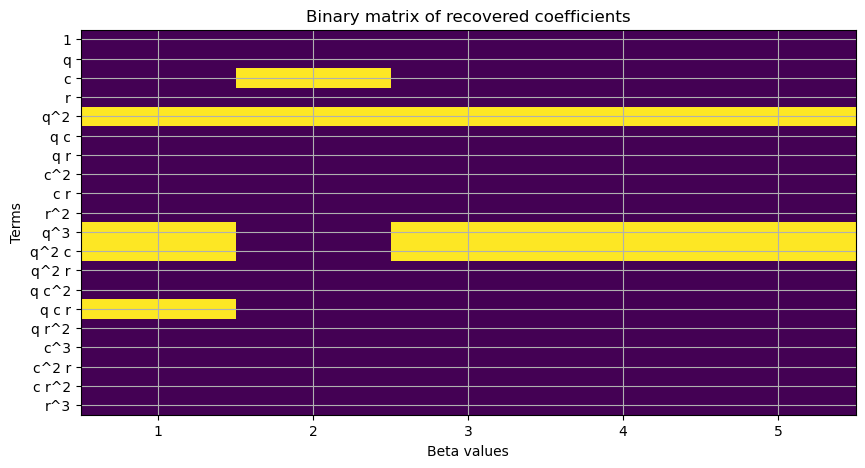

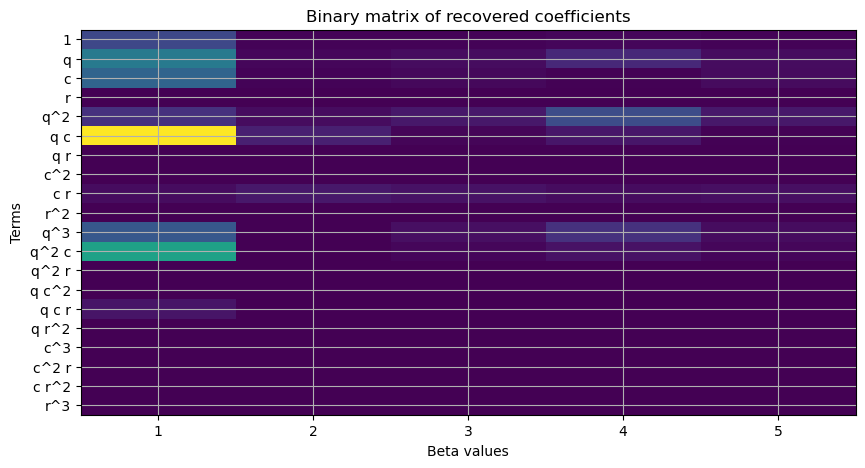

In [79]:
# Make a binary vector of the groundtruth values and the recovered values
coeffs = df.values

# replace all values that are not zero with 1
coeffs_binary = np.zeros(coeffs.shape)
for i in range(coeffs.shape[1]):
    coeffs_binary[:,i][coeffs[:,i] != 0] = 1

# calculate the number of correctly recovered coefficients by comparing with column 0
correctly_recovered = np.sum(coeffs_binary == coeffs_binary[:,0].reshape(-1,1), axis=0)
print(f'Correctly recovered coefficients: {correctly_recovered[1:]}')

# plot the matrix
plt.figure(figsize=(10,5))
plt.imshow(np.abs(coeffs_binary[:,1:] - coeffs_binary[:,0].reshape(-1, 1)), aspect='auto')
plt.xlabel("Beta values")
plt.ylabel("Terms")
plt.yticks(range(coeffs.shape[0]), df.index)
plt.xticks(range(coeffs.shape[1]-1), [c.split("beta")[1] for c in df.columns[1:]])
plt.title("Binary matrix of recovered coefficients")
plt.grid()
plt.show()

# plot the matrix
plt.figure(figsize=(10,5))
plt.imshow(np.abs(coeffs[:,1:] - coeffs[:,0].reshape(-1, 1)), aspect='auto')
plt.xlabel("Beta values")
plt.ylabel("Terms")
plt.yticks(range(coeffs.shape[0]), df.index)
plt.xticks(range(coeffs.shape[1]-1), [c.split("beta")[1] for c in df.columns[1:]])
plt.title("Binary matrix of recovered coefficients")
plt.grid()
plt.show()